In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


def extract_all_rgb_colors(image_path):
    # Load an image
    img = mpimg.imread(image_path)

    # Get dimensions of the image
    height, width, _ = img.shape

    # Flatten the image array to a 2D array
    flattened_image = img.reshape((height * width, -1))

    # Extract RGB colors from all pixels
    rgb_colors = flattened_image[:, :3]

    return rgb_colors

# Example usage
image_path = '/content/drive/MyDrive/Colab Notebooks/gojo.jpeg'

# Extract all RGB colors
colors = extract_all_rgb_colors(image_path)

# Display the original image
plt.imshow(mpimg.imread(image_path))
plt.title('Original Image')
plt.show()

# Display a small image with the extracted colors
color_image = colors.reshape((img.shape[0], img.shape[1], 3))
plt.imshow(color_image)
plt.title('All RGB Colors')
plt.show()



ModuleNotFoundError: No module named 'matplotlib'

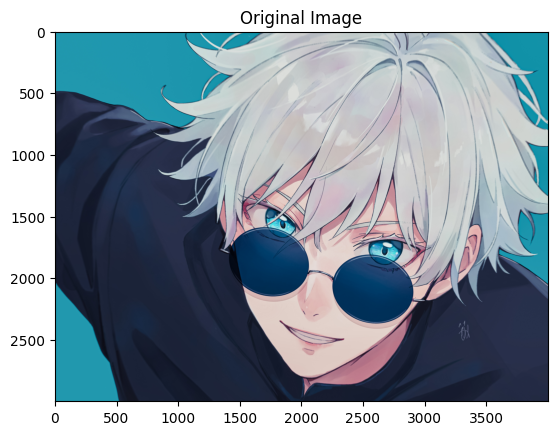

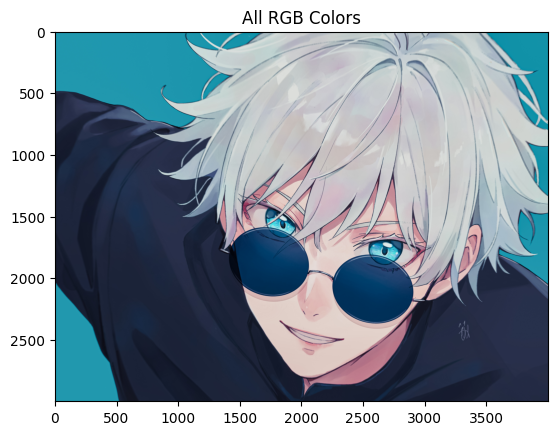

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Example usage
image_path = '/content/drive/MyDrive/Colab Notebooks/gojo.jpeg'

# Load an image
img = mpimg.imread(image_path)

# Display the original image
plt.imshow(img)
plt.title('Original Image')
plt.show()

def extract_all_rgb_colors(image_path):
    # Load an image
    img = mpimg.imread(image_path)

    # Get dimensions of the image
    height, width, _ = img.shape

    # Flatten the image array to a 2D array
    flattened_image = img.reshape((height * width, -1))

    # Extract RGB colors from all pixels
    rgb_colors = flattened_image[:, :3]

    return rgb_colors

# Example usage
# Extract all RGB colors
colors = extract_all_rgb_colors(image_path)

# Display a small image with the extracted colors
color_image = colors.reshape((img.shape[0], img.shape[1], 3))
plt.imshow(color_image)
plt.title('All RGB Colors')
plt.show()


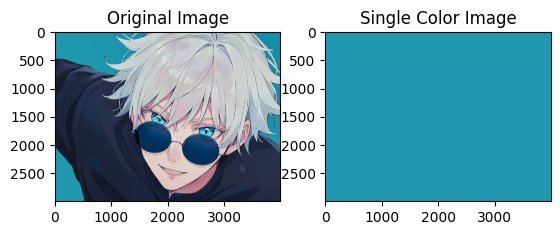

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

def display_single_color(image_path, color_index):
    # Load an image
    img = mpimg.imread(image_path)

    # Extract all RGB colors
    colors = img.reshape((-1, 3))

    # Choose a specific color from the colors array
    selected_color = colors[color_index]

    # Reshape the selected color to match the shape of the original image
    single_color_image = np.ones_like(img) * selected_color.reshape(1, 1, 3)

    # Display the original image
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title('Original Image')

    # Display the small image with the selected color
    plt.subplot(1, 2, 2)
    plt.imshow(single_color_image)
    plt.title('Single Color Image')

    plt.show()

# Example usage
image_path = '/content/drive/MyDrive/Colab Notebooks/gojo.jpeg'
color_index = 1  # Change this index to select a different color

# Display the selected color
display_single_color(image_path, color_index)



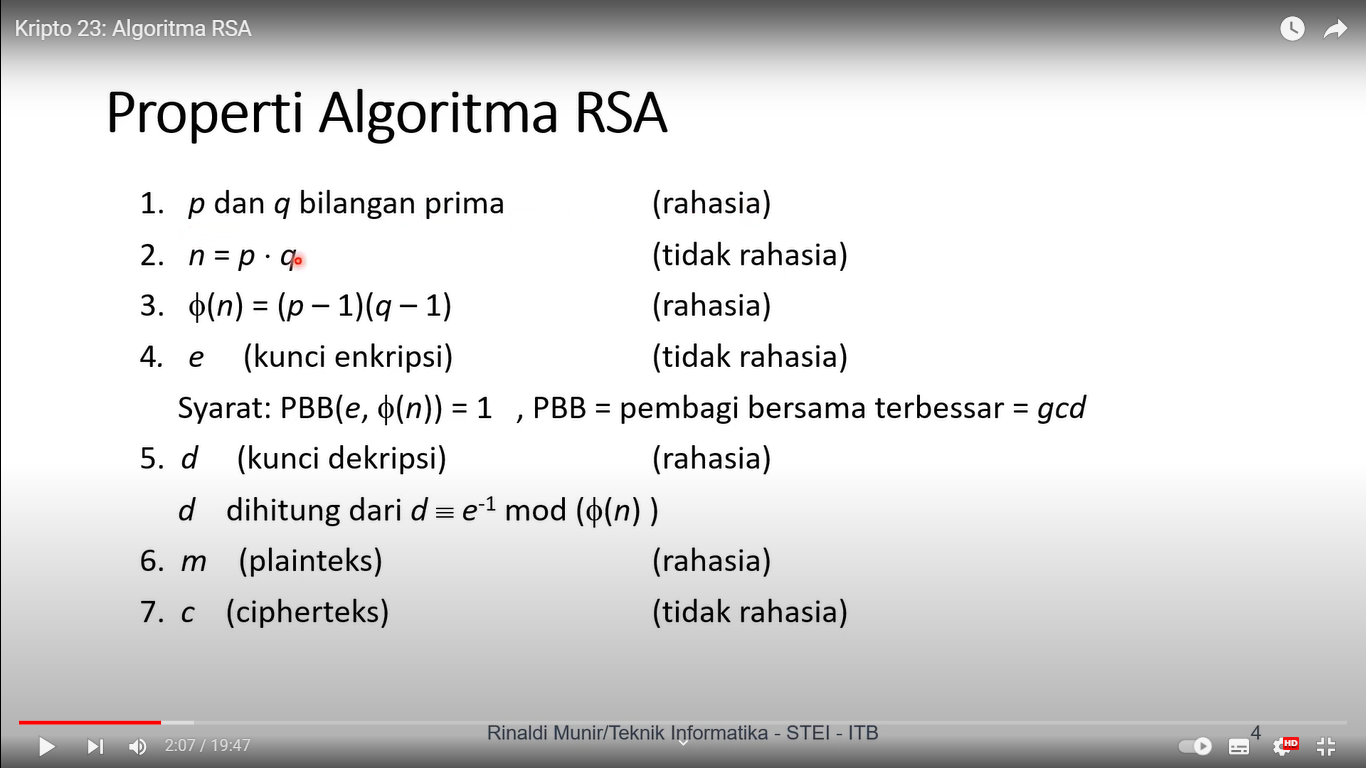

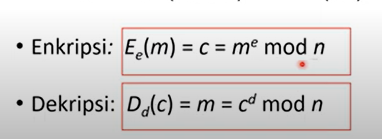

In [ ]:
import random
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt

In [ ]:
def gen_prime():
    while True:
        num = random.randint(2**7, 2**10)
        if is_prime(num):
            return num

In [ ]:
def is_prime(num):
    if num < 2:
        return False
    for i in range(2, int(num**0.5) + 1):
        if num % i == 0:
            return False
    return True

In [ ]:
def read_image(image_path):
  image = img.imread(image_path)
  return image

In [ ]:
def image_shape(image):
  w, h = image.shape[:2]
  return w, h

In [ ]:
def construct_rgb(image, w, h):
  r = np.zeros((w, h))
  g = np.zeros((w, h))
  b = np.zeros((w, h))
  for i in range(w):
    for j in range(h):
      r[i][j] = image[i][j][0]
      g[i][j] = image[i][j][1]
      b[i][j] = image[i][j][2]

  return r, g, b

In [ ]:
def gcd(a, b):
    while b:
        a, b = b, a % b
    return abs(a)

In [ ]:
def gen_p_q():
  p = gen_prime()
  q = gen_prime()
  while(p==q):
    q = gen_prime()

  return p,q

In [ ]:
def calculate_totient_n(p,q):
  totient = (p-1)*(q-1)
  n = p*q
  return totient, n

In [ ]:
def gen_public_key(totient):
  e = random.randrange(1, totient)
  while (gcd(e, totient) != 1):
    e = random.randrange(1, totient)

  return e

In [ ]:
def gen_private_key(e, totient):
    d = None
    k = 1
    exit = False
    while not exit:
        temp = totient * k + 1
        d = float(temp/e)
        d_int = int(d)
        k += 1
        if(d_int == d):
            exit=True
    return int(d)

In [ ]:
def encryption(m, e, n):
    m_cipher = np.copy(m)
    m_key = np.empty_like(m)
    for i in range(len(m)):
      for j in range(len(m[0])):
        m_cipher[i][j] = pow(int(m[i][j]), e, n)
        m_key[i][j] = m_cipher[i][j] // 256
        m_cipher[i][j] %= 256

    return m_cipher, m_key

In [ ]:
def combine_channels(r, g, b, w, h):
    combined_image = np.zeros((w, h, 3))
    combined_image[:, :, 0] = r
    combined_image[:, :, 1] = g
    combined_image[:, :, 2] = b
    return combined_image

In [ ]:
def gen_keypair():
  p, q = gen_p_q()
  totient, n = calculate_totient_n(p, q)
  e = gen_public_key(totient)
  d = gen_private_key(e, totient)

  return e, d, n

In [ ]:
def RSA_encrypt(file_path,e,n):
  plain_img = read_image(file_path)
  w, h = image_shape(plain_img)
  r, g, b = construct_rgb(plain_img,w,h)

  r, key_r = encryption(r,e,n)
  np.save('key_r.npy', key_r)

  g, key_g = encryption(g,e,n)
  np.save('key_g.npy', key_g)

  b, key_b = encryption(b,e,n)
  np.save('key_b.npy', key_b)

  #combine image
  combined_image = combine_channels(r, g, b, w, h) / 255.0

  return combined_image, 'key_r.npy', 'key_g.npy', 'key_b.npy'


In [ ]:
#First Step
#Receiver generate key pair
e, d, n = gen_keypair()
print(e)
print(d)
print(n)

19999
1735
127349


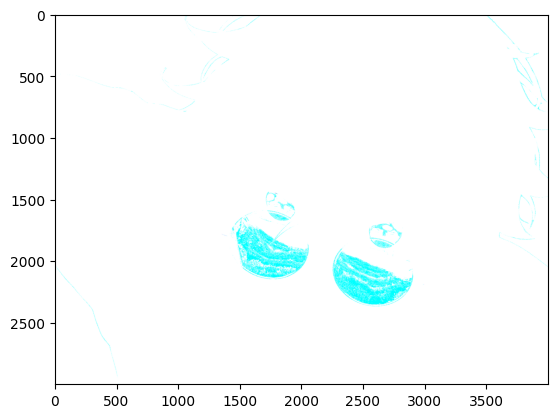

In [ ]:
#Sender encrypt with public key that sent and generate by the receiver (e,n)
img_cipher, key_r_path, key_g_path, key_b_path= RSA_encrypt("/content/drive/MyDrive/Colab Notebooks/gojo.jpeg", e, n)
plt.imshow(img_cipher)

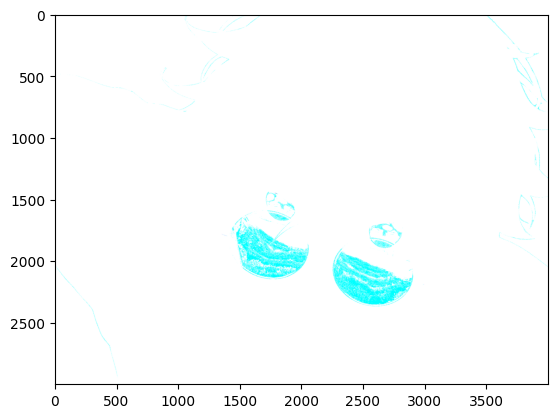

In [ ]:
img_cipher, n, e, key_r_path, key_g_path, key_b_path= RSA_encrypt("/content/drive/MyDrive/Colab Notebooks/gojo.jpeg")
plt.imshow(img_cipher)

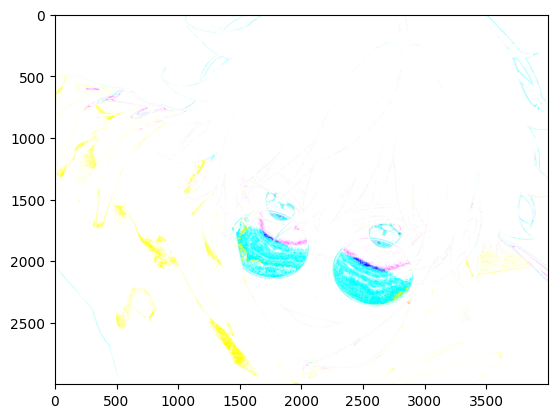

In [ ]:
img_cipher = RSA_encrypt("/content/drive/MyDrive/Colab Notebooks/gojo.jpeg")
plt.imshow(img_cipher)

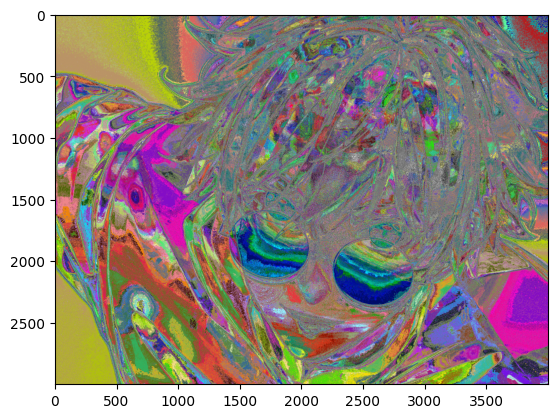

In [ ]:
#Sender encrypt with public key that sent and generate by the receiver (e,n)
img_cipher_1, key_r_path, key_g_path, key_b_path= RSA_encrypt("/content/drive/MyDrive/Colab Notebooks/gojo.jpeg", e, n)
plt.imshow(img_cipher_1)

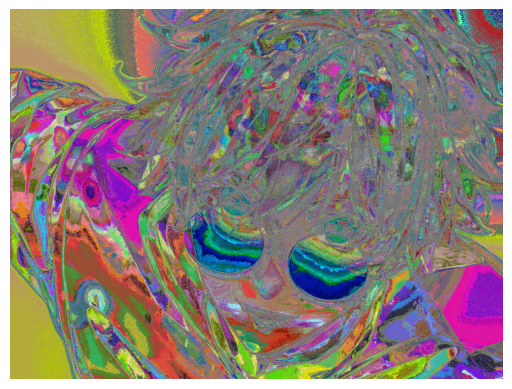

In [ ]:
img_cir=img_cipher/255.0
plt.imshow(img_cir)
plt.axis('off')  # Turn off axis labels
plt.show()

In [ ]:
def decryption(m, k, d, n):
    m_plain = np.copy(m)
    m_key = np.copy(k)
    for i in range(len(m)):
      for j in range(len(m[0])):
        m_plain[i][j] = m_key[i][j] * 256 + m_plain[i][j]
        m_plain[i][j] = pow(int(m_plain[i][j]),d,n)

    return m_plain

In [ ]:
def RSA_decrypt(m, kr, kg, kb, d, n):
    cipher_img = m * 255.0
    w, h = image_shape(cipher_img)
    r, g, b = construct_rgb(cipher_img,w,h)

    key_r = np.load(kr)
    key_b = np.load(kb)
    key_g = np.load(kg)

    r_plain = decryption(r, key_r, d, n)
    g_plain = decryption(g, key_g, d, n)
    b_plain = decryption(b, key_b, d, n)

    combined_image = combine_channels(r_plain, g_plain, b_plain, w, h)/255.0

    return combined_image

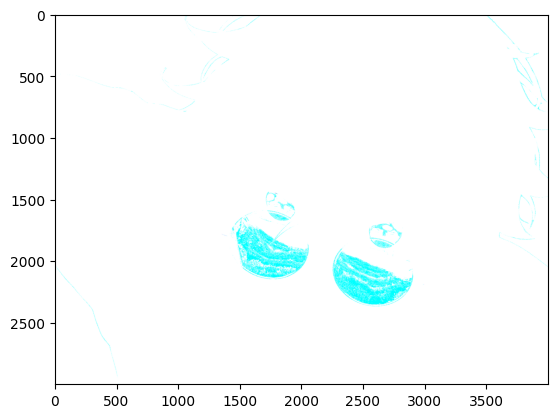

In [ ]:
img_plain = RSA_decrypt(img_cipher, key_r_path, key_g_path, key_b_path, d, n)
plt.imshow(img_plain)

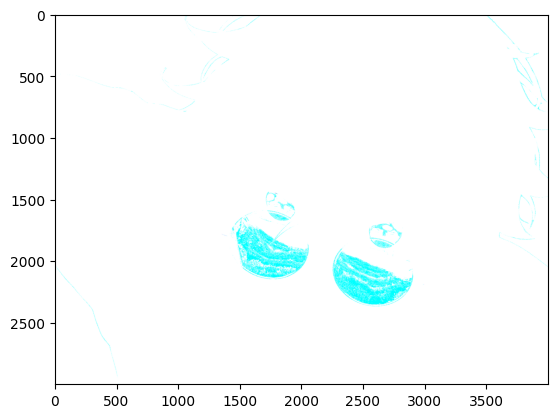

In [ ]:
img_plain_1 = RSA_decrypt(img_cir, key_r_path, key_g_path, key_b_path, d, n)
plt.imshow(img_plain_1)

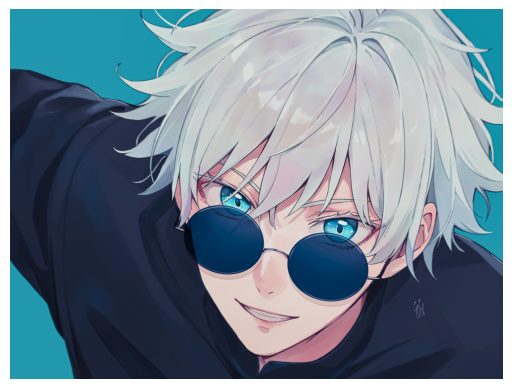

In [ ]:
img_normalized=img_plain_1/255.0
plt.imshow(img_normalized)
plt.axis('off')  # Turn off axis labels
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
